# Stack Overflow Survey Analysis

[Stack Overflow](http://stackoverflow.com/) is likely the largest and most trusted online community of professional developers in the world today. I'm a Software Engineer myself and I can't think of a week in the past year in which I didn't check it at least once to find an answer to a particular problem I faced. Whenever I run a Google search for a problem, I usually jump at the first stack overflow link provided and chances are I won't have to go anywhere else.

Since 2011, Stack Overflow has been running an [Annual Developer](https://insights.stackoverflow.com/survey/) survey that examines all aspects of the developer experience, from career satisfaction and job search to education and opinions on open source software. I learned about it recently, and it immediately sparked my interest as it offers an opportunity to zoom out and learn about current trends in the field I'm part of.

Stack Overflow already provides an in-depth analysis of the responses. I examined the [2019 analysis](https://insights.stackoverflow.com/survey/2019) and I thought it was really good, but one thing I would like to have seen is a breakdown of the responses at a continent level. They do provide response counts at this level in the Methodology section, but I didn't find anything else past that. Additionally, I didn't get a sense about how the results compare to previous years.

This motivated me to run an analysis of my own in which I zoom out to the continents level and look at the responses for the past 3 years. Based on the kind of responses I found interesting in the surveys, I'll focus on the following questions:

- How many responses were received?
- What's the distribution of respondent's gender?
- What's the distribution of coding years?
- What are the most popular programming languages?

My goal is to get a sense of how diverse (or uniform) the responses are across the world when looked from certain dimensions that I personally find relevant. Additionally, by looking at past years we can potentially get an idea of some trends in the field.

## Loading the Data

Let's start by importing all the required libraries in a single place:

In [1]:
import json

from hdx.location.country import Country
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pycountry_convert as pyc_convert

sns.set();
sns.set_style("whitegrid");
%matplotlib inline

Assuming the initial setup instructions from the project [README.md](https://github.com/ojcastillo/StackOverflow-Survey-Analysis/blob/master/README.md#initial-setup) were followed, there should now be a folder `datasets` with the survey results from 2017, 2018 and 2019. With that in place, we can read the data in the following way:

In [2]:
# Load 2017, 2018, and 2019 datasets into a single dictionary
datasets = {}
for year in (2017, 2018, 2019):
    print('Loading data for year', year)
    datasets[year] = {
        'data': pd.read_csv(f'./datasets/{year}/survey_results_public.csv'),
        'schema': pd.read_csv(f'./datasets/{year}/survey_results_schema.csv'),
    }

Loading data for year 2017
Loading data for year 2018


/Users/orlando/anaconda3/envs/stackoverflow/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading data for year 2019


We'll ignore the warning when reading the data for 2018 since the values are loaded still (as mentioned [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.errors.DtypeWarning.html)) and we can clean them later. But let's examine each dataset for validation and get an idea of the kind of data we're dealing with: 

In [3]:
# For each year, print the number of (rows, columns) and a sample of 3 rows 
for year in datasets:
    print(f'\n{year} dataset')
    print('Number of (rows, columns):', datasets[year]['data'].shape)
    display(datasets[year]['data'].head(3))


2017 dataset
Number of (rows, columns): (51392, 154)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN



2018 dataset
Number of (rows, columns): (98855, 129)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



2019 dataset
Number of (rows, columns): (88883, 85)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


## Preparing data for analysis

Working backwards from the questions that I want to answer, my aim is to construct a single data frame that contains the following dimensions per response:

- Year of response
- Continent of residence
- Gender
- Programming languages used
- Years coding

To kick things off, let's first find out what columns are shared across the datasets already:

In [4]:
# Construct a set of the column names shared across datasets
common_cols = (set(datasets[2017]['schema'].Column) 
    & set(datasets[2018]['schema'].Column)
    & set(datasets[2019]['schema'].Column))
print('Common column across datasets: ', common_cols)

Common column across datasets:  {'Gender', 'Country', 'Respondent'}


So country and gender are already common across datasets, and we get year for free as we already divide them that way. Respondent we can potentially use to join new columns later. So let's start by constructing a single dataframe that has year, respondent, country and gender dimensions:

In [5]:
def join_datasets_by_year(datasets, columns):
    """Joins the `columns` of yearly divided `datasets` into a single DataFrame.
    
    The function assummes the columns provided exist across datasets
    to construct a single DataFrame that contains those in addition
    to a 'Year' dimension.
    """
    full_df = None
    for year in datasets:
        year_df = datasets[year]['data'][columns].copy()
        year_df['Year'] = year
        if full_df is None:
            full_df = year_df
        else:
            full_df = full_df.append(year_df)
    return full_df

In [6]:
# Used the above function to generate a single dataframe with the common columns
full_df = join_datasets_by_year(datasets, ['Respondent', 'Country', 'Gender'])
print('Number of rows in new single DataFrame: ', full_df.shape[0])
full_df.head()

Number of rows in new single DataFrame:  239130


,Respondent,Country,Gender,Year
0,1,United States,Male,2017
1,2,United Kingdom,Male,2017
2,3,United Kingdom,Male,2017
3,4,United States,Male,2017
4,5,Switzerland,NaN,2017


From country we can get continent, and gender we can hopefully use after some cleaning. For the rest of columns, we'll have to  examine the non-overlapping columns to figure out what to do.

### Adding a continent dimension

To determine the continent from a country, I plan to use the [pycountry-convert](https://github.com/jefftune/pycountry-convert) library. But first I need to determine the [ISO 3166-1 alpha-2](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) for each country, and for that part of the problem I'll use [hdx-python-country](https://github.com/OCHA-DAP/hdx-python-country) as it offers a powerful fuzzy search.

The class below implements all the logic necessary to make this happen, being careful about caching results. Also, it provides mapping to the countries the libraries failed to map:

In [7]:
class ContinentLookup():
    """Allows looking up for continents given a country name.
    
    Internally the class takes advantage of the hdx-python-country fuzzy search to infer
    the ISO 2 code of the country. It then uses pycountry-convert to convert to a two
    letter continent code. It additionally mantains a local mapping for regions for which
    the libraries failed to map.
    """
    
    # Except for Antartica, the mapping was extracted by searching for 
    # the country ISO 2 code online and then mapping to continent using 
    # the function Country.get_country_info_from_iso2 to get the region
    MANUAL_CONTINENT_MAPPING = {
        'moldavia': 'EU',
        'azerbaidjan': 'AS',
        'antarctica': 'AN',
        'u.s. minor outlying islands': 'NA',
        'tadjikistan': 'AS',
        'timor-leste': 'AS',
        'pitcairn island': 'EU',
        'vatican city state': 'EU',
    }
    
    # Manual mapping of 2 code continents to their full identifiers
    CODE_TO_CONTINENT_MAPPING = {
        'AF': 'Africa',
        'EU': 'Europe',
        'AS': 'Asia',
        'NA': 'North America',
        'SA': 'South America',
        'OC': 'Oceania',
        'AN': 'Antartica',
    }

    def __init__(self):
        """Init that sets up an empty cache for continent lookups."""
        self.lookup_cache = {}
    
    def infer_country_iso2(self, country):
        """Try to infer ISO 2 country code from a `country` name."""
        iso3 = Country.get_iso3_country_code_fuzzy(country)[0]
        return None if iso3 is None else Country.get_iso2_from_iso3(iso3)
    
    def infer_continent(self, country):
        """Try to infer continent from a `country` name, or returns 'Undefined' if it fails."""
        clower = country.lower()
        if clower in self.lookup_cache:
            return self.lookup_cache[clower]

        if clower in self.MANUAL_CONTINENT_MAPPING:
            self.lookup_cache[clower] = self.MANUAL_CONTINENT_MAPPING[clower]
        else:
            alpha_2 = self.infer_country_iso2(country)
            self.lookup_cache[clower] = 'Undefined'
            if alpha_2 is not None:
                try:
                    self.lookup_cache[clower] = pyc_convert.country_alpha2_to_continent_code(alpha_2)
                except KeyError:
                    pass
        self.lookup_cache[clower] = self.CODE_TO_CONTINENT_MAPPING.get(self.lookup_cache[clower], 'Undefined')
        return self.lookup_cache[clower]

In [8]:
# Use the class defined above to add a new Continent column
continent_lookup = ContinentLookup()
full_df['Continent'] = full_df['Country'].apply(lambda c: continent_lookup.infer_continent(str(c)));
full_df.head()

,Respondent,Country,Gender,Year,Continent
0,1,United States,Male,2017,North America
1,2,United Kingdom,Male,2017,Europe
2,3,United Kingdom,Male,2017,Europe
3,4,United States,Male,2017,North America
4,5,Switzerland,NaN,2017,Europe


As a sanity check, let's get a breakdown of counts per continent:

In [9]:
full_df['Continent'].value_counts()

Europe           97043
North America    64859
Asia             54015
South America     9314
Africa            6749
Oceania           6232
Undefined          904
Antartica           14
Name: Continent, dtype: int64

So despite my best efforts, we still have 904 undefined continents. Luckily, that represents less than 1% of the total of 239130 rows. Let's examine those country responses to confirm there's nothing more we can do:

In [10]:
print(full_df[full_df.Continent == 'Undefined']['Country'].unique())

['I prefer not to say' 'Other Country (Not Listed Above)' nan]


So only the cases for which we actually don't have a country are the one that have no continent defined. Is possible some other responses in the survey could be used to infer a country, but I consider that out of scope for this analysis.

### Cleaning the gender column 

Let's get a breakdown of gender values per year:

In [11]:
full_df.groupby(['Year', 'Gender']).size()

Year  Gender                                                                   
2017  Female                                                                        2600
      Female; Gender non-conforming                                                   29
      Female; Gender non-conforming; Other                                             1
      Female; Other                                                                    1
      Female; Transgender                                                             56
      Female; Transgender; Gender non-conforming                                       8
      Female; Transgender; Gender non-conforming; Other                                1
      Female; Transgender; Other                                                       1
      Gender non-conforming                                                          160
      Gender non-conforming; Other                                                     4
      Male                    

So we have responses with multiple genders specified. Luckily it looks like the same separator is used across, so that means we should be able to extract each individual gender. I'm thinking of creating extra boolean columns for each of these genders instead of managing a single column, that should make it easier to get counts for each group later.

First, let's get the set of possible genders in the answers:

In [12]:
def extract_uniques(array_of_values, sep=';'):
    """Extracts the set of values in `array_of_values`, assuming they're separated by `sep`"""
    return set() if pd.isna(array_of_values) else {val.strip() for val in array_of_values.split(sep)}

In [13]:
# Use the above function to extract the unique set of gender values
gender_set = set()
for row in full_df['Gender']:
    gender_set |= extract_uniques(row)
print('Unique gender values: ', gender_set)

Unique gender values:  {'Non-binary, genderqueer, or gender non-conforming', 'Gender non-conforming', 'Man', 'Male', 'Female', 'Woman', 'Other', 'Transgender'}


Some columns look redundant to me personally, e.g. Male is the same as Man. Taking that into account, let's expand the data frame with the following columns: `Gender_Female`, `Gender_Non_Conforming`, `Gender_Male`, `Gender_Other`, and `Gender_Transgender`.

Because of the potential for multiple values in a row, then we can't use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) directly. Instead I'll iterate over all rows to do what I want (the code below is expected to take a couple of minutes to run):

In [14]:
def explode_column(df, column, mapping, sep=';', prefix=None):
    """Create boolean columns from another one that can contain an array of values.
    
    Given a `column` in which a list of values are potentially given per-row
    separated by the `sep` character, the function will use the `mapping`
    dict to mark the corresponding new column as True when the value is present.
    The new columns generated will be of the form '<prefix>_<suffix>', where
    `prefix` is `prefix` or `column` if that's NONE, and `suffix` are all the keys
    in the `mapping` dictionary.
    """
    
    # Use the column name as prefix if none given
    if prefix is None:
        prefix = column

    # Create the columns with a default of False for all of them
    new_columns = [f'{prefix}_{suffix}' for suffix in mapping.keys()] 
    for col in new_columns:
        df[col] = False
    
    # Create the inverse value to column mapping to make the incoming transformation easier
    inverse_mapping = {}
    for suffix, values in mapping.items():
        for value in values:
            inverse_mapping[value] = f'{prefix}_{suffix}'
    
    # Now set to True each of the columns identified in the row
    def _transform_row(row):
        for value in extract_uniques(row[column], sep):
            row[inverse_mapping[value]] = True
        return row
    return df.apply(lambda row: _transform_row(row), axis=1)

In [15]:
# Use the above function to generate new boolean columns for each gender value
column_to_values_map = {
    'Female': ['Female', 'Woman'],
    'Male': ['Male', 'Man'], 
    'Non_Conforming': ['Gender non-conforming', 'Non-binary, genderqueer, or gender non-conforming'],
    'Transgender': ['Transgender'],
    'Other': ['Other'],
}

exploded_df = explode_column(full_df, 'Gender', column_to_values_map)
exploded_df.head()

,Respondent,Country,Gender,Year,Continent,Gender_Female,Gender_Male,Gender_Non_Conforming,Gender_Transgender,Gender_Other
0,1,United States,Male,2017,North America,False,True,False,False,False
1,2,United Kingdom,Male,2017,Europe,False,True,False,False,False
2,3,United Kingdom,Male,2017,Europe,False,True,False,False,False
3,4,United States,Male,2017,North America,False,True,False,False,False
4,5,Switzerland,NaN,2017,Europe,False,False,False,False,False


### Adding remaining columns

I still need to find a way to extract the following dimensions:

- Programming languages used
- Years coding

And for that, I'll need to get more familiar with the rest of the questions in the survey. Given how many columns each of the datasets have, I'll try to reduce the search effort with a substring matching given a list of keywords:

In [16]:
def find_candidate_questions(schema, keywords):
    """Find the subset of `schema` column names that have at leas one of the `keywords` as substring"""
    keywords = [keyword.lower() for keyword in keywords]
    candidates = []
    for idx, row in schema.iterrows():
        for keyword in keywords:
            if keyword in row['Column'].lower():
                candidates.append(row['Column'])
                break
    return list(candidates)

In [17]:
# Use the above function to find questions that might tell us about years of coding 
# and programming languages used
keywords = ['program', 'cod', 'language', 'year']
for year in datasets:
    candidates = sorted(find_candidate_questions(datasets[year]['schema'], keywords))
    print(f'\nPotential columns to examine from the {year} survey: {candidates}')


Potential columns to examine from the 2017 survey: ['CheckInCode', 'ExCoder10Years', 'ExCoderActive', 'ExCoderBalance', 'ExCoderBelonged', 'ExCoderNotForMe', 'ExCoderReturn', 'ExCoderSkills', 'ExCoderWillNotCode', 'HaveWorkedLanguage', 'OtherPeoplesCode', 'ProgramHobby', 'StackOverflowCopiedCode', 'WantWorkLanguage', 'YearsCodedJob', 'YearsCodedJobPast', 'YearsProgram']

Potential columns to examine from the 2018 survey: ['CheckInCode', 'DatabaseDesireNextYear', 'FrameworkDesireNextYear', 'HopeFiveYears', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'PlatformDesireNextYear', 'YearsCoding', 'YearsCodingProf']

Potential columns to examine from the 2019 survey: ['Age1stCode', 'CodeRev', 'CodeRevHrs', 'DatabaseDesireNextYear', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'PlatformDesireNextYear', 'WebFrameDesireNextYear', 'YearsCode', 'YearsCodePro']


From all of these, I think `LanguageWorkedWith`, `HaveWorkedLanguage`, `YearsProgram`, `YearsCodedJob`, `YearsCoding`, and `YearsCode` have potential. Let's examine those more closely:

In [18]:
def extract_question_txt(schema, column):
    """Extract the question description from a dataset schema"""
    try:
        txt = schema[schema.Column == column].QuestionText
    except:
        txt = schema[schema.Column == column].Question
    return list(txt)[0]

In [19]:
# Use the above function to get a full description of relevant survey questions
column_mapping = [
    (2017, 'HaveWorkedLanguage'),
    (2017, 'YearsProgram'),
    (2017, 'YearsCodedJob'),
    (2018, 'LanguageWorkedWith'),
    (2018, 'YearsCoding'),
    (2019, 'LanguageWorkedWith'),
    (2019, 'YearsCode'),
]
for year, col in column_mapping:
    description = extract_question_txt(datasets[year]["schema"], col)
    print(f'\nFull description for {col} question from {year}: "{description}"')
    print('Sample rows:', list(datasets[year]['data'][col])[:3])


Full description for HaveWorkedLanguage question from 2017: "Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?"
Sample rows: ['Swift', 'JavaScript; Python; Ruby; SQL', 'Java; PHP; Python']

Full description for YearsProgram question from 2017: "How long has it been since you first learned how to program?"
Sample rows: ['2 to 3 years', '9 to 10 years', '20 or more years']

Full description for YearsCodedJob question from 2017: "For how many years have you coded as part of your job?"
Sample rows: [nan, nan, '20 or more years']

Full description for LanguageWorkedWith question from 2018: "Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
Sample rows:

Looks like this is the right set of responses and they look roughly consistent across datasets. In particular, I'll use both `HaveWorkedLanguage` and `LanguageWorkedWith` for extracting programming languages used, and `YearsProgram`, `YearsCoding` and `YearsCode` for learning about how many years of total coding.

Let's first join these columns into the single dataframe, taking advantage of past functions to make it easier:

In [20]:
# `LanguageWorkedWith` is the column we'll use for languages used, so force 2017 to have it
datasets[2017]['data']['LanguageWorkedWith'] = datasets[2017]['data']['HaveWorkedLanguage']

# `YearsCoding` is the column we'll use for years coding, so force 2017 and 2019 to have it
datasets[2017]['data']['YearsCoding'] = datasets[2017]['data']['YearsProgram']
datasets[2019]['data']['YearsCoding'] = datasets[2019]['data']['YearsCode']

# Now join them into a single dataframe. We'll take care of joining them to the main dataframe later.
extra_df = join_datasets_by_year(datasets, ['Respondent', 'LanguageWorkedWith', 'YearsCoding'])
print('Size of new intermidiate dataframe:', extra_df.shape)
extra_df.head()

Size of new intermidiate dataframe: (239130, 4)


,Respondent,LanguageWorkedWith,YearsCoding,Year
0,1,Swift,2 to 3 years,2017
1,2,JavaScript; Python; Ruby; SQL,9 to 10 years,2017
2,3,Java; PHP; Python,20 or more years,2017
3,4,Matlab; Python; R; SQL,14 to 15 years,2017
4,5,NaN,20 or more years,2017


We could do the same trick as we did for gender and explode the column into multiple ones, but I want to look at the possible unique values first before investing on that path:

In [21]:
for col in ('LanguageWorkedWith', 'YearsCoding'):
    value_set = set()
    for row in extra_df[col]:
        value_set |= extract_uniques(row)
    print(f'\nUnique values for {col}: {sorted(value_set)}')


Unique values for LanguageWorkedWith: ['Assembly', 'Bash/Shell', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'CSS', 'Clojure', 'Cobol', 'CoffeeScript', 'Common Lisp', 'Dart', 'Delphi/Object Pascal', 'Elixir', 'Erlang', 'F#', 'Go', 'Groovy', 'HTML', 'HTML/CSS', 'Hack', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lua', 'Matlab', 'Objective-C', 'Ocaml', 'Other(s):', 'PHP', 'Perl', 'Python', 'R', 'Ruby', 'Rust', 'SQL', 'Scala', 'Smalltalk', 'Swift', 'TypeScript', 'VB.NET', 'VBA', 'Visual Basic 6', 'WebAssembly']

Unique values for YearsCoding: ['0-2 years', '1', '1 to 2 years', '10', '10 to 11 years', '11', '11 to 12 years', '12', '12 to 13 years', '12-14 years', '13', '13 to 14 years', '14', '14 to 15 years', '15', '15 to 16 years', '15-17 years', '16', '16 to 17 years', '17', '17 to 18 years', '18', '18 to 19 years', '18-20 years', '19', '19 to 20 years', '2', '2 to 3 years', '20', '20 or more years', '21', '21-23 years', '22', '23', '24', '24-26 years', '25', '26', '27', '27-29

We'll need to clean the values a bit, but overall it looks like something we can handle. We could try to find patterns between entries programmatically, but I don't think is worth the effort so I'll just provide a fixed mapping:

In [22]:
# Extracting programming languages
language_mapping = {
    'Assembly': ['Assembly'],
    'Shell': ['Bash/Shell', 'Bash/Shell/PowerShell'],
    'C': ['C'],
    'C#': ['C#'],
    'C++': ['C++'],
    'CSS': ['CSS', 'HTML/CSS'],
    'Clojure': ['Clojure'],
    'Cobol': ['Cobol'],
    'CoffeeScript': ['CoffeeScript'],
    'CommonLisp': ['Common Lisp'],
    'Dart': ['Dart'],
    'Pascal': ['Delphi/Object Pascal'],
    'Elixir': ['Elixir'],
    'Erlang': ['Erlang'],
    'F#': ['F#'],
    'Go': ['Go'],
    'Groovy': ['Groovy'],
    'HTML': ['HTML', 'HTML/CSS'],
    'Hack': ['Hack'],
    'Haskell': ['Haskell'],
    'Java': ['Java'],
    'JavaScript': ['JavaScript'],
    'Julia': ['Julia'],
    'Kotlin': ['Kotlin'],
    'Lua': ['Lua'],
    'Matlab': ['Matlab'],
    'Objective-C': ['Objective-C'],
    'Ocaml': ['Ocaml'],
    'Other': ['Other(s):'],
    'PHP': ['PHP'],
    'Perl': ['Perl'],
    'Python': ['Python'],
    'R': ['R'],
    'Ruby': ['Ruby'],
    'Rust': ['Rust'],
    'SQL': ['SQL'],
    'Scala': ['Scala'],
    'Smalltalk': ['Smalltalk'],
    'Swift': ['Swift'],
    'TypeScript': ['TypeScript'],
    'VB.NET': ['VB.NET'],
    'VBA': ['VBA'],
    'Visual Basic 6': ['Visual Basic 6'],
    'WebAssembly': ['WebAssembly']
}
extra_df = explode_column(extra_df, 'LanguageWorkedWith', language_mapping, prefix='Language')
extra_df.head()

,Respondent,LanguageWorkedWith,YearsCoding,Year,Language_Assembly,Language_Shell,Language_C,Language_C#,Language_C++,Language_CSS,...,Language_Rust,Language_SQL,Language_Scala,Language_Smalltalk,Language_Swift,Language_TypeScript,Language_VB.NET,Language_VBA,Language_Visual Basic 6,Language_WebAssembly
0,1,Swift,2 to 3 years,2017,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,JavaScript; Python; Ruby; SQL,9 to 10 years,2017,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,3,Java; PHP; Python,20 or more years,2017,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Matlab; Python; R; SQL,14 to 15 years,2017,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,5,NaN,20 or more years,2017,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# Extracting years of coding. For this one, I'm assumming the year ranges in the answers are inclusive at the beggining but exclusive at the end. I figured 6 groups was good enough resolution for my analysis.
years_mapping = {
    '0to2': ['0-2 years', '1', '1 to 2 years', 'Less than 1 year', 'Less than a year'],
    '2to5': ['2', '2 to 3 years', '3', '3 to 4 years', '3-5 years', '4', '4 to 5 years'],    
    '5to8': ['5', '5 to 6 years', '6', '6 to 7 years', '6-8 years', '7', '7 to 8 years'],    
    '8to14': ['8', '8 to 9 years', '9', '9 to 10 years', '9-11 years', '10 to 11 years', 
              '11 to 12 years', '11', '10', '12-14 years', '12 to 13 years', '13 to 14 years',
              '12', '13'],    
    '14to20': ['14 to 15 years', '14', '15', '15 to 16 years', '15-17 years', '16', '16 to 17 years',
               '17 to 18 years', '17', '18', '18 to 19 years', '18-20 years', '19', '19 to 20 years'],
    '20orMore': ['20 or more years', '20', '21', '21-23 years', '22', '23', '24', '24-26 years', '25',
                 '26', '27', '27-29 years', '28', '29', '30', '30 or more years', '31', '32', '33', 
                 '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', 
                 '48', '49', '50', 'More than 50 years'],
}
extra_df = explode_column(extra_df, 'YearsCoding', years_mapping)
extra_df.filter(regex='^YearsCoding',axis=1).head()

,YearsCoding,YearsCoding_0to2,YearsCoding_2to5,YearsCoding_5to8,YearsCoding_8to14,YearsCoding_14to20,YearsCoding_20orMore
0,2 to 3 years,False,True,False,False,False,False
1,9 to 10 years,False,False,False,True,False,False
2,20 or more years,False,False,False,False,False,True
3,14 to 15 years,False,False,False,False,True,False
4,20 or more years,False,False,False,False,False,True


With the extra dimensions in place, we can now join into a new clean dataframe that we can use for analysis:

In [24]:
# Run an inner join to create the final dataframe version
clean_df = exploded_df.merge(extra_df, on=['Year', 'Respondent'])
clean_df.head(1)

,Respondent,Country,Gender,Year,Continent,Gender_Female,Gender_Male,Gender_Non_Conforming,Gender_Transgender,Gender_Other,...,Language_VB.NET,Language_VBA,Language_Visual Basic 6,Language_WebAssembly,YearsCoding_0to2,YearsCoding_2to5,YearsCoding_5to8,YearsCoding_8to14,YearsCoding_14to20,YearsCoding_20orMore
0,1,United States,Male,2017,North America,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [25]:
# Extra validation to gain confidence on the join
print('Shape of full_df: ', full_df.shape)
print('Columns in full_df: ', sorted(full_df.columns))

print('\nShape of extra_df: ', extra_df.shape)
print('Columns in extra_df: ', sorted(extra_df.columns))

print('\nShape of clean_df: ', clean_df.shape)
print('Columns in clean_df: ', sorted(clean_df.columns))

Shape of full_df:  (239130, 10)
Columns in full_df:  ['Continent', 'Country', 'Gender', 'Gender_Female', 'Gender_Male', 'Gender_Non_Conforming', 'Gender_Other', 'Gender_Transgender', 'Respondent', 'Year']

Shape of extra_df:  (239130, 54)
Columns in extra_df:  ['LanguageWorkedWith', 'Language_Assembly', 'Language_C', 'Language_C#', 'Language_C++', 'Language_CSS', 'Language_Clojure', 'Language_Cobol', 'Language_CoffeeScript', 'Language_CommonLisp', 'Language_Dart', 'Language_Elixir', 'Language_Erlang', 'Language_F#', 'Language_Go', 'Language_Groovy', 'Language_HTML', 'Language_Hack', 'Language_Haskell', 'Language_Java', 'Language_JavaScript', 'Language_Julia', 'Language_Kotlin', 'Language_Lua', 'Language_Matlab', 'Language_Objective-C', 'Language_Ocaml', 'Language_Other', 'Language_PHP', 'Language_Pascal', 'Language_Perl', 'Language_Python', 'Language_R', 'Language_Ruby', 'Language_Rust', 'Language_SQL', 'Language_Scala', 'Language_Shell', 'Language_Smalltalk', 'Language_Swift', 'Langua

Looks like the join went well as the number of rows and columns is what I expected. I'll remove some columns we won't need for the analysis:

In [26]:
clean_df.drop(['Gender', 'LanguageWorkedWith', 'YearsCoding'], axis=1, inplace=True)
print('Final columns for analysis: ', sorted(clean_df.columns))

Final columns for analysis:  ['Continent', 'Country', 'Gender_Female', 'Gender_Male', 'Gender_Non_Conforming', 'Gender_Other', 'Gender_Transgender', 'Language_Assembly', 'Language_C', 'Language_C#', 'Language_C++', 'Language_CSS', 'Language_Clojure', 'Language_Cobol', 'Language_CoffeeScript', 'Language_CommonLisp', 'Language_Dart', 'Language_Elixir', 'Language_Erlang', 'Language_F#', 'Language_Go', 'Language_Groovy', 'Language_HTML', 'Language_Hack', 'Language_Haskell', 'Language_Java', 'Language_JavaScript', 'Language_Julia', 'Language_Kotlin', 'Language_Lua', 'Language_Matlab', 'Language_Objective-C', 'Language_Ocaml', 'Language_Other', 'Language_PHP', 'Language_Pascal', 'Language_Perl', 'Language_Python', 'Language_R', 'Language_Ruby', 'Language_Rust', 'Language_SQL', 'Language_Scala', 'Language_Shell', 'Language_Smalltalk', 'Language_Swift', 'Language_TypeScript', 'Language_VB.NET', 'Language_VBA', 'Language_Visual Basic 6', 'Language_WebAssembly', 'Respondent', 'Year', 'YearsCodin

## Analysis
In this section, for each continent in the past 3 years, I focus on providing answer to the following questions:

- How many responses were received?
- What's the distribution of respondent's gender?
- What's the distribution of coding years?
- What are the most popular programming languages?

Each subsection will focus on one question, where I'll try to provide answers using high level mathematical instruments that should be easy to consume by people with little technical background.

### How many responses were received?

My main intention is to learn about where most of the responses are coming from and whether that has changed with the years. The following box plot shows the amount of responses from each continent across years in the same place for easy comparison:

Text(0.5, 1.0, 'Number of responses per continent across years')

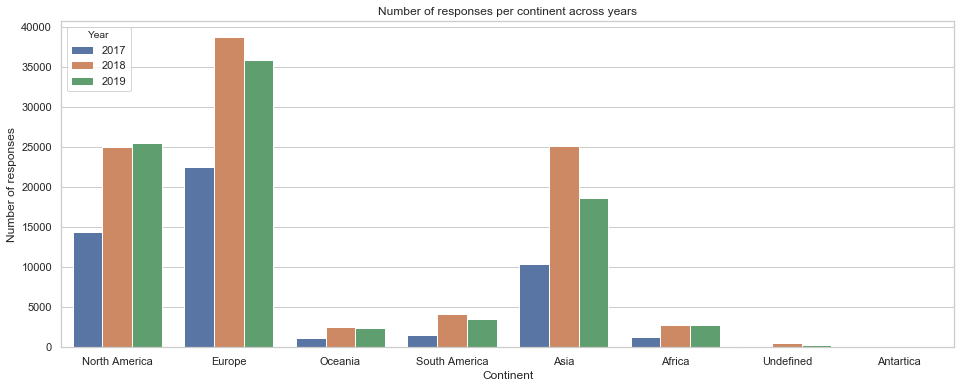

In [27]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='Continent', hue='Year', data=clean_df)
ax.set_ylabel('Number of responses')
ax.set_title('Number of responses per continent across years')

The first thing I noticed is how North America, Europe and Asia have way more responses than the rest, and I don't want to miss on across the world. Before sharing my observations, I'll take a second pass and split across continents so each can have their own count resolution:

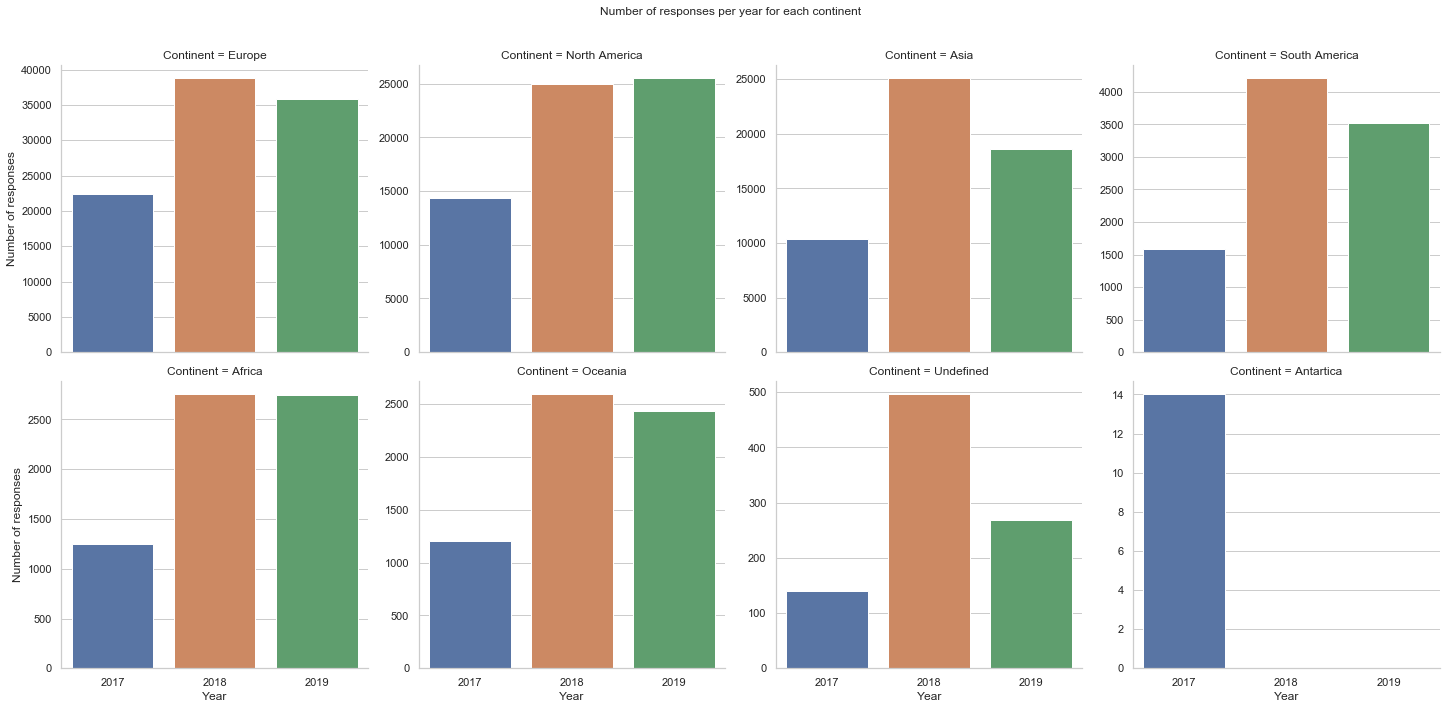

In [28]:
col_order = ['Europe', 'North America', 'Asia', 'South America', 'Africa', 'Oceania',
             'Undefined', 'Antartica']
fg = sns.catplot(x='Year', col="Continent", kind="count", col_wrap=4, sharey=False,
                 col_order=col_order, data=clean_df)
fg.set_ylabels('Number of responses')
plt.subplots_adjust(top=0.9)
fg.fig.suptitle('Number of responses per year for each continent');

With that, here are my overall observations:

- As mentioned, most of the responses are coming from North America, Europe and Asia. The survey observed an increase in responses from the other groups, but they're not significant enough to compete yet.
- There was a significant increase in the number of responses in all continents from 2017 to 2018 but it looks like that wasn't replicated from 2018 to 2019. Continents either observed a similar amount of responses or a noticeable smaller amount of them. The methodology section of the 2019 survey mentioned that it wasn't accessible to the entire world, so that could be part of it.
- I'm a little surprised to find out that Europe continues to be where most of the responses are coming from. Asia observed less of them on 2019, which is not what I would expect. It could be that Stack Overflow faces fundamental technical challenges to reach the region.
- Only 2017 observed responses from Antartica. The might have been user errors, and likely the next years removed the option from the possible countries to select.

### What's the distribution of respondent's gender?

I would like to be surprised in this section. I'm hoping to find more diversity in the respondent base with each passing year. I'll focus on plotting the gender distribution across continents on their own axis, and for that I'll [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) the gender variable first:

In [29]:
def melt_bool_cols_with_prefix(df, id_vars, var_name, col_prefix):
    """Generates a dataframe in which boolean columns prefixed by `col_prefix` are melted
    
    The new dataframe will keep the columns `id_vars` and add a `var_name` column. Rows will
    be melted in such a way that boolean columns with the prefix `col_prefix` are transformed 
    from wide into a long format, then further prunned to only keep rows in which the original
    columns were True for that particular row.
    """
    cols_to_melt = [col for col in df.columns if col.startswith(col_prefix)]
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=cols_to_melt,
                        var_name=var_name, value_name='Value')
    melted_df = melted_df[melted_df.Value == True]
    melted_df[var_name] = melted_df[var_name].str.replace(col_prefix, '')
    return melted_df.drop('Value', axis=1)

In [30]:
# Melt gender values so we can more easily count them later
gender_melt = melt_bool_cols_with_prefix(clean_df, ['Year', 'Continent'], 'Gender', 'Gender_')
print('Melted version of dataset in which rows represent all the possible gender responses')
print('Dimensions: ', gender_melt.shape)
display(gender_melt.head())

Melted version of dataset in which rows represent all the possible gender responses
Dimensions:  (186789, 3)


,Year,Continent,Gender
10,2017,North America,Female
13,2017,Europe,Female
103,2017,North America,Female
165,2017,Europe,Female
214,2017,Europe,Female


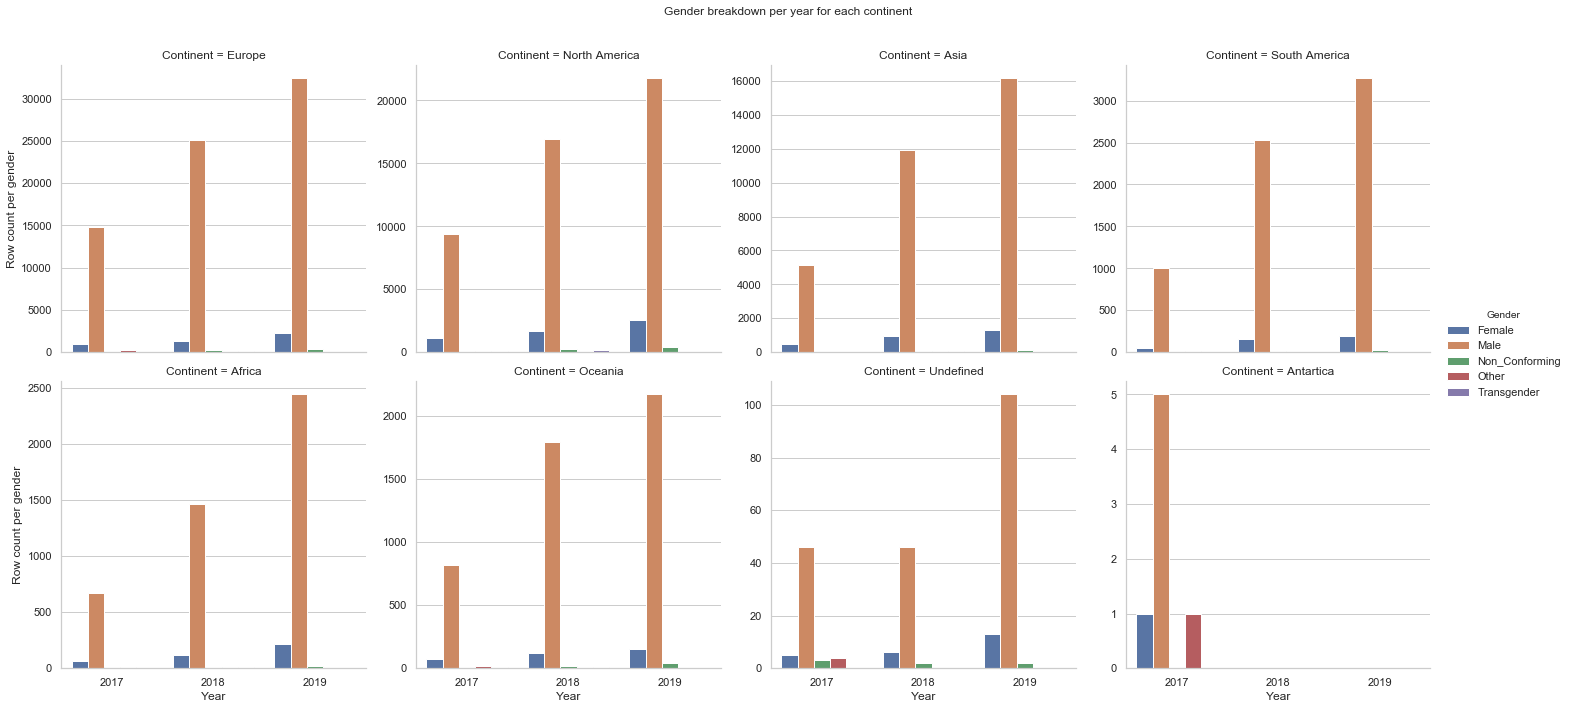

In [31]:
# Count plot with the gender count breakdown across continents and years
gender_cols = [col for col in clean_df.columns if col.startswith('Gender_')]
hue_order = sorted([col.replace('Gender_', '') for col in gender_cols])
fg = sns.catplot(x='Year', col="Continent", hue="Gender", hue_order=hue_order, kind="count", col_wrap=4,
                 sharey=False, col_order=col_order, data=gender_melt)
fg.set_ylabels('Row count per gender')
plt.subplots_adjust(top=0.9)
fg.fig.suptitle('Gender breakdown per year for each continent');

I'm not surprised with the fact that Male has the highest absolute count across. But I'm more interested in looking at the proportions across. For that, I'll pre-aggregate the melted dataset to display a box plot:

In [32]:
# Proportion calculation from the melted version of the dataset
sizes = gender_melt.groupby(['Year', 'Continent', 'Gender']).size()
agg_gender_melt = sizes.div(sizes.groupby(['Year', 'Continent']).transform('sum')).reset_index().rename(columns={
    0: 'Proportion',
})
print('Dimensions of the new aggregated version of the melt: ', agg_gender_melt.shape)
agg_gender_melt.head()

Dimensions of the new aggregated version of the melt:  (85, 4)


,Year,Continent,Gender,Proportion
0,2017,Africa,Female,0.082138
1,2017,Africa,Male,0.878748
2,2017,Africa,Non_Conforming,0.010430
3,2017,Africa,Other,0.019557
4,2017,Africa,Transgender,0.009126


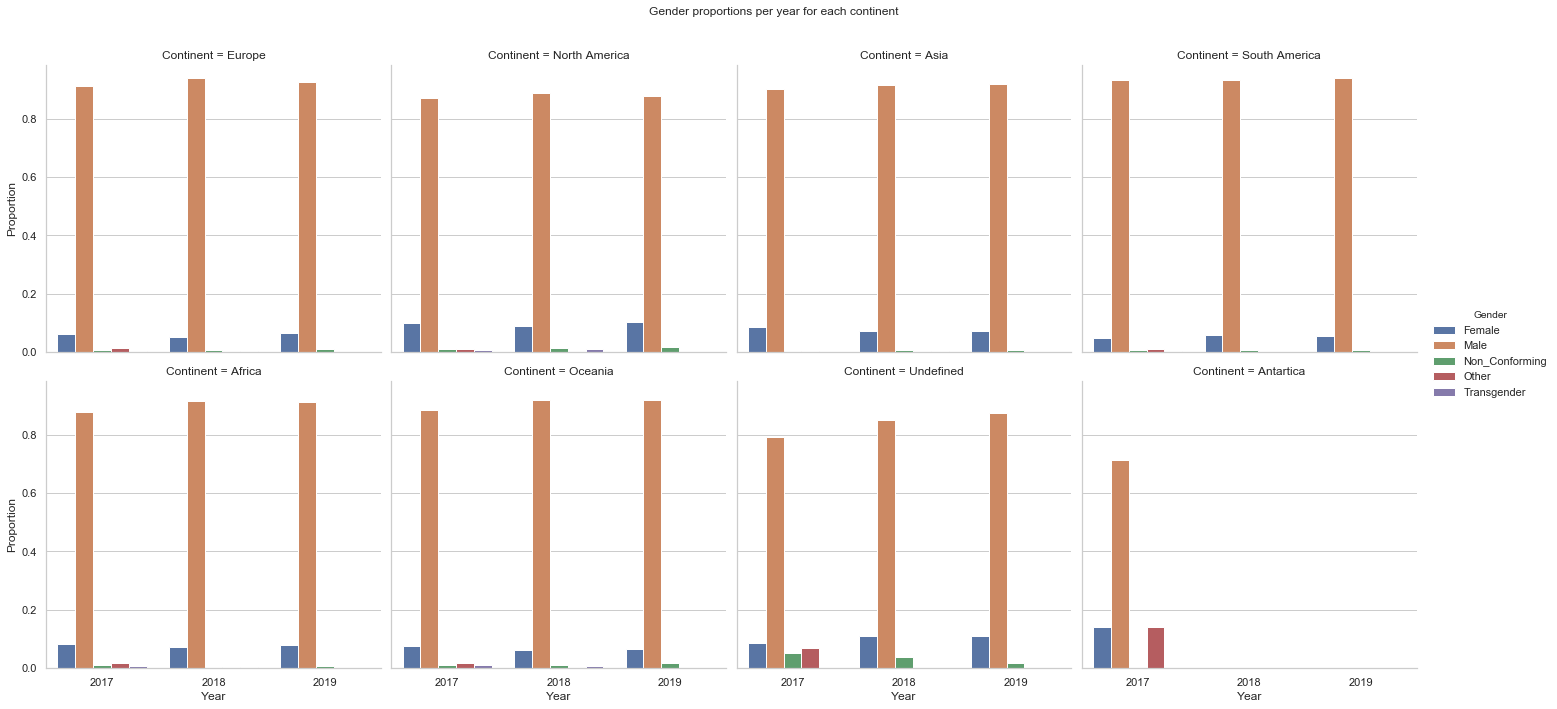

In [33]:
# Box plot with the gender proportion breakdown across continents and years.  Notice I'm sharing the Y axis 
# this time as I want to use the same scale for easier comparison
fg = sns.catplot(x='Year', y='Proportion', col="Continent", hue="Gender", kind="bar", col_wrap=4,
                 sharey=True, data=agg_gender_melt, hue_order=hue_order, col_order=col_order)
fg.set_ylabels('Proportion')
plt.subplots_adjust(top=0.9)
fg.fig.suptitle('Gender proportions per year for each continent');

So not only are Male respondents the largest group by far, but it seems the proportions are pretty much the same across continents and that hasn't changed much in the past 3 years. Antartica's proportions during 2017 are the exception, but that's likely because of the small sample size.

Given how dominant the Male group is, I think is worth iterating over the graph. First, let's look at the proportions but without the male group to better surface the rest:

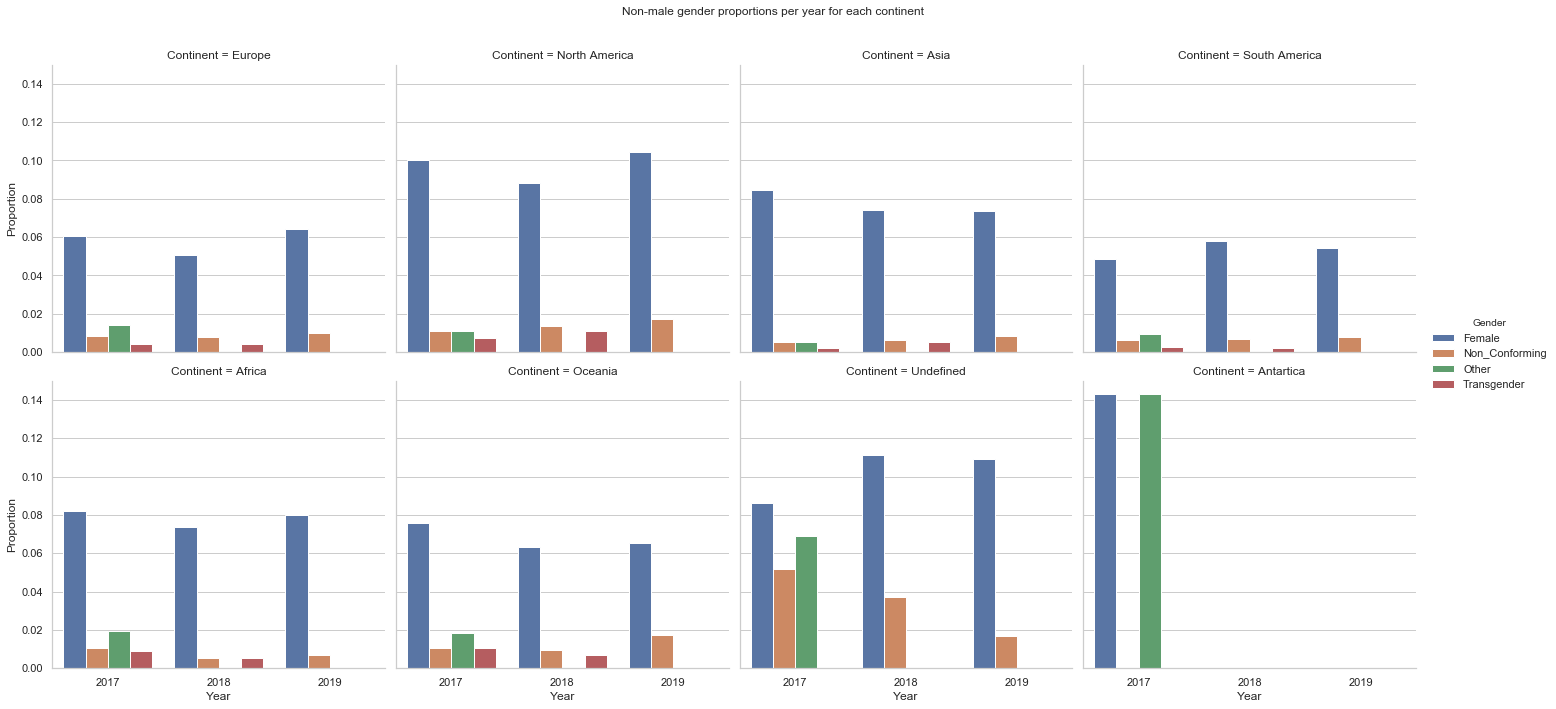

In [34]:
# Same as previous box plot, but without the male gender
fg = sns.catplot(x='Year', y='Proportion', col="Continent", hue="Gender", kind="bar", col_wrap=4,
                 sharey=True, data=agg_gender_melt[agg_gender_melt.Gender != 'Male'], col_order=col_order)
fg.set_ylabels('Proportion')
plt.subplots_adjust(top=0.9)
fg.fig.suptitle('Non-male gender proportions per year for each continent');

Female is clearly the next largest group, but it never becomes more than 15% of the respondent's base. The remaining groups are really small in comparison, and it seems some of the diversity was lost in later years as for example the `Other` group disappears. I'm curious about that, so let's look into unique gender responses but this time just grouped by year:

In [35]:
print('Gender breakdown per year:')
display(gender_melt.groupby(['Year', 'Gender']).size())

Gender breakdown per year:


Year  Gender        
2017  Female             2743
      Male              31890
      Non_Conforming      314
      Other               428
      Transgender         180
2018  Female             4409
      Male              59785
      Non_Conforming      595
      Transgender         423
2019  Female             6709
      Male              78302
      Non_Conforming     1011
dtype: int64

Only `Female`, `Male`, and `Non_Conforming` stay present across years. `Other` is missing since 2018 and `Transgender` since 2019. By inspecting further the [2019 demographics analysis](https://insights.stackoverflow.com/survey/2019#demographics), I discovered that transgender identity was separated from the question about gender identity. The [2018 demographics analysis](https://insights.stackoverflow.com/survey/2018#demographics) doesn't mention what happened to `Other` so not sure why it was decided it was ok to remove. Is not within scope for me to judge if this was the correct approach or not, but it explains what's observed in the above graphs.

After learning about all the above, I would also like to take another step and group non-male genders into a single group so I get a sense of how much that has changed with each passing year:

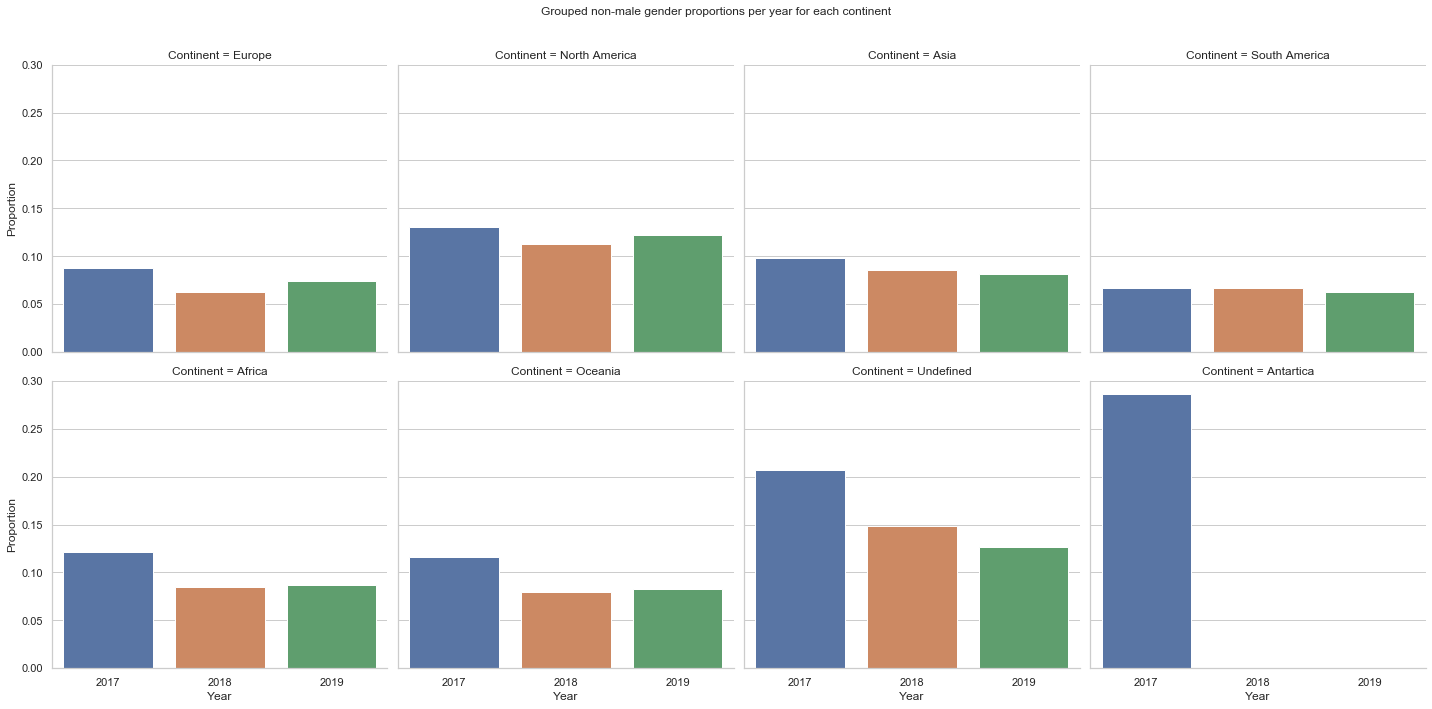

In [36]:
# Group non-male rows by year and continent and plot the sum of proportions
non_male = agg_gender_melt[agg_gender_melt.Gender != 'Male'].groupby(['Year', 'Continent']).sum().reset_index()
fg = sns.catplot(x='Year', y='Proportion', col="Continent", kind="bar", col_wrap=4,
                 sharey=True, data=non_male, col_order=col_order)
fg.set_ylabels('Proportion')
plt.subplots_adjust(top=0.9)
fg.fig.suptitle('Grouped non-male gender proportions per year for each continent');

It seems the non-male group didn't grow much in the past 3 years. In fact, it looks like is actually becoming smaller in certain regions! That's a surprise to me, I would have anticipated some noticeable improvements. I know the industry is facing a [large gender gap](https://www.nytimes.com/2019/06/21/technology/gender-gap-tech-computer-science.html), but is possible the survey is fundamentally failing to reach this population.

In addition to the graphs, is worth sharing the average group representations and their respective standart deviations for the year of 2019 to have a sense of current status:

In [37]:
latest_agg = agg_gender_melt[agg_gender_melt.Year == 2019]
print('2019 average percentage and respective standart deviation per gender:')
for gender in sorted(latest_agg.Gender.unique()):
    avg = latest_agg[latest_agg.Gender == gender]['Proportion'].mean() * 100
    std = latest_agg[latest_agg.Gender == gender]['Proportion'].std() * 100    
    print(f'\t{gender}: ({avg}, {std})')

2019 average percentage and respective standart deviation per gender:
	Female: (7.88137114081813, 2.0776604914076886)
	Male: (90.90963390886905, 2.396509210305568)
	Non_Conforming: (1.2089949503128317, 0.48017531993237905)


To summarize all the above:

- By visual inspection, one can easily tell respondents that identify as `Male` are the largest group by far. Across continents in the last year, they represent on average about 90.9% of the population. Not only that, but further visual inspection and a 2.4% of standart deviation seem to indicate the reality doesn't change much around the world.
- `Female` follows as the second largest group, but is trailing way behind with just an average representation of about 8%. Again, visual inspection and a 2.1% of standart deviation seem to indicate the reality doesn't change much around the world
- When combining responses from non-male genders into a single group, one can easily notice that they haven't grown much in the past 3 years. In fact, it looks like the group is actually becoming smaller in certain regions!

### What's the distribution of coding years?

I think the tech industry wants to see a healthy mix of years of coding in the market given the high demand for professionals in this area, as more options to tailor job offerings likely increases the chances of success. I'm curious about what I'll find when I look at this from a continent perspective.

We can follow a similar procedure for what we did for gender and [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) the years of coding variable first, then proceed to plot the distribution of continents on their own axis:

In [38]:
# Melt coding years values so we can more easily count them later
code_yrs_melt = melt_bool_cols_with_prefix(clean_df, ['Year', 'Continent'], 'YearsCoding', 'YearsCoding_')
print('Melted version of dataset in which rows represent all the possible conding year ranges responses')
print('Dimensions: ', code_yrs_melt.shape)
display(code_yrs_melt.head())

Melted version of dataset in which rows represent all the possible conding year ranges responses
Dimensions:  (232918, 3)


,Year,Continent,YearsCoding
43,2017,Europe,0to2
50,2017,Asia,0to2
103,2017,North America,0to2
110,2017,Europe,0to2
141,2017,Europe,0to2


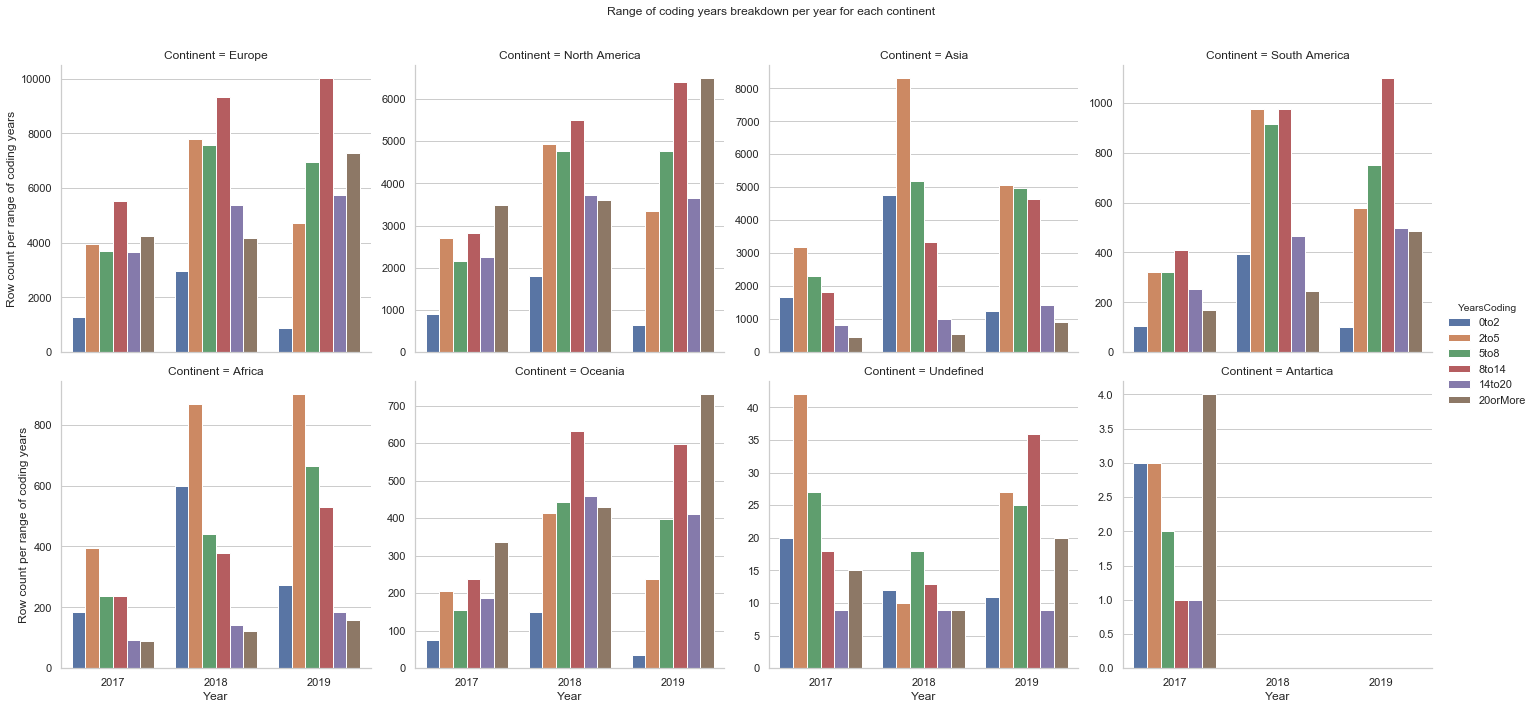

In [39]:
# Count plot with the coding years ranges count breakdown across continents and years
hue_order = ['0to2', '2to5', '5to8', '8to14', '14to20', '20orMore']
fg = sns.catplot(x='Year', col="Continent", hue="YearsCoding", hue_order=hue_order, kind="count", col_wrap=4,
                 sharey=False, col_order=col_order, data=code_yrs_melt)
fg.set_ylabels('Row count per range of coding years')
plt.subplots_adjust(top=0.9)
fg.fig.suptitle('Range of coding years breakdown per year for each continent');

One thing that stands out to me is how the distribution of ranges seems to be bell shaped at times (2018 Europe), but other times it seems skewed left (2019 North America) or skewed right (2018 Asia). I was expecting to find distributions skewed right to be the dominant pattern as the years progress as an indication of more people entering the field worldwide, but maybe this makes sense after thinking about it some more. I've read about how [Asia](https://www.sc.com/en/trade-beyond-borders/emerging-asia-is-the-present-and-future-for-growth/) and [Africa](https://www.africa-business.com/features/africa-emerging-business.html) are observing some of the fastest economic growth around the world, so this could be a reflection of that. Care should be taken to conclude much about the overall population distribution thought, as the survey reach seems to be skewed to Western countries at the moment, indicated by the dominant sample sizes of both Europe and North America. Still, I find this to be an interesting result! 

### What are the most popular programming languages?

As a Software Engineer, is part of my job to keep up with latest developments and that includes programming languages. I'm curious to learn about what are the most popular languages around the world according to the survey.

I'll again melt the dataframe, in particular all the columns with a `Language_` prefix. Once that's done, I'll proceed to calculate the usage proportions of languages in each continent and year and then extract the top 5 from each group:

In [40]:
# Melt programming languages values and include a proportion column to plot them later
lang_melt = melt_bool_cols_with_prefix(clean_df, ['Year', 'Continent'], 'Language', 'Language_')
sizes = lang_melt.groupby(['Year', 'Continent', 'Language']).size()
agg_lang_melt = sizes.div(sizes.groupby(['Year', 'Continent']).transform('sum')).reset_index().rename(columns={
    0: 'Proportion',
})
print('Melted version of dataset in which rows represent all the possible programming language responses')
print('Dimensions: ', agg_lang_melt.shape)
agg_lang_melt.head()

Melted version of dataset in which rows represent all the possible programming language responses
Dimensions:  (716, 4)


,Year,Continent,Language,Proportion
0,2017,Africa,Assembly,0.016444
1,2017,Africa,C,0.040645
2,2017,Africa,C#,0.093081
3,2017,Africa,C++,0.048402
4,2017,Africa,Clojure,0.001551


In [41]:
# Get an aggregated dataframe that allows to get top N represented programming languages per year and continent
sorted_df = agg_lang_melt.sort_values(['Year', 'Continent', 'Proportion'], ascending=False)
top_lang_agg = sorted_df.groupby(['Year', 'Continent'])

print('Sample of the aggregated dataframe which is returning top 2 programming languages:')
top_lang_agg.head(2).head()

Sample of the aggregated dataframe which is returning top 2 programming languages:


,Year,Continent,Language,Proportion
698,2019,Undefined,HTML,0.137771
700,2019,Undefined,JavaScript,0.137771
672,2019,South America,JavaScript,0.148462
670,2019,South America,HTML,0.134511
644,2019,Oceania,JavaScript,0.139782


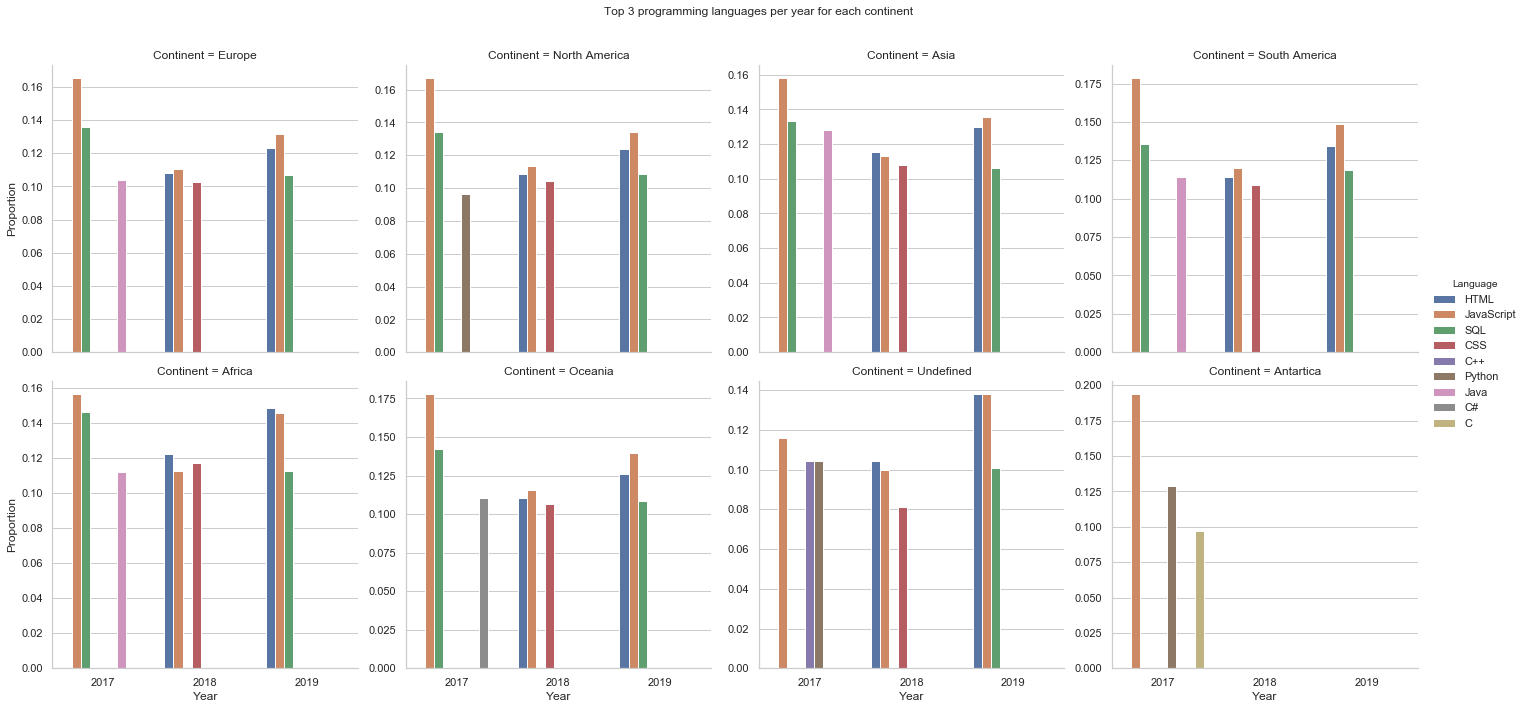

In [42]:
# Top 3 languages per continents and year
fg = sns.catplot(x='Year', y="Proportion", col="Continent", hue="Language", kind="bar", col_wrap=4,
                 sharey=False, col_order=col_order, data=top_lang_agg.head(3))
fg.set_ylabels('Proportion')
plt.subplots_adjust(top=0.9)
fg.fig.suptitle('Top 3 programming languages per year for each continent');

From the survery perspective, it looks like Web has been king for the past 3 years! `Javascript` is one of the main languages used by Frontend Developers, and it has been on the top for the past 3 years across continents. `HTML` and `CSS` are also highly popular, which are also part of the Web development toolkit. `SQL` is language frequently used by Backend Web Developers, so is likely also an indication of Web popularity. Only during 2017 we can observe other general programming languages like `Java`, `C++`, `Python`.

## Conclusion

I started this analysis with the hope of discovering diversity when looking at responses from a continent perspective, but I found they share more similarities than differences: 

- Looking at the number of responses from each of the continents for the past 3 years, I discovered most of them are coming from North America, Europe and Asia. But all continents observed the same trend: responses increased from 2017 to 2018, but from 2018 to 2019 they either stayed mostly the same or went down. Difficulty to reach the survey from some parts of the world might partly explain why responses went down on 2019 in certain continents.
- While examining the distributions of gender's responses, I discovered that male is the largest group around the world by far, and it seems the degree of dominance is pretty similar across and it hasn't changed much in the past 3 years. When combining responses from non-male genders into a single group, one can easily notice that they haven't grown much. In fact, it looks like the group is actually becoming smaller in some places!
- On the other hand, the distribution of coding year ranges offered the most diverse results I observed in my analysis. The distribution was bell shaped at times (2018 Europe), but other times it seems skewed left (2019 North America) or skewed right (2018 Asia).
- Finally, I discovered that some of the most popular programming languages around the world are the ones used for Web Development: `Javascript`, `HTML/CSS`, and `SQL`. Only during 2017 we can observe other general programming languages like `Java`, `C++`, `Python` at the top.

## Future Work

As proposal for future work, here are some ideas:

- I didn't apply [survey weighting](https://www.decisionanalyst.com/blog/dataweighting/) in this analysis. The [2019 Survey analysis](https://insights.stackoverflow.com/survey/2019#developer-roles) mentions it was applied to better reflect the underlying population distribution. This could offer a much better picture of the gender distribution reality.
- Given the amount of programming languages, it might make sense to group them into categories that represent the role family which makes the most use of them. That way, we would likely visually trends across years more easily.
- Extending some of the analysis to include more years could offer a better picture about the underlying trends.
- The dataset generated from this analysis is already on a good path to be used for modeling. For example, we could potentially try to infer the job role with the data in place.
- There are more questions that I think could be looked into. Here are some I find interesting:
  - What sort of roles do respondents have? How much do they earn?
  - How often do users visit Stack Overflow?
  - What's the education level and professional background of respondents?
  - What's the distribution of employment status?